Link for course page - https://jovian.com/learn/nautral-language-processing-zero-to-nlp/assignment/sentiment-analysis-of-movie-reviews  
Libk for video - https://www.youtube.com/watch?v=6VnJqJCHdzo

# 1 - Problem Statement

Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "Sentiment Analysis on Movie Reviews" Kaggle competition (https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)

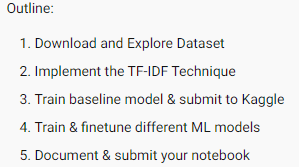

Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews

# 2 - Download the Data

In [9]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews


  0%|          | 0.00/1.90M [00:00<?, ?B/s]
 53%|#####2    | 1.00M/1.90M [00:01<00:01, 855kB/s]
100%|##########| 1.90M/1.90M [00:01<00:00, 1.61MB/s]
100%|##########| 1.90M/1.90M [00:01<00:00, 1.41MB/s]


In [23]:
import os
import zipfile

zip_file_path = 'sentiment-analysis-on-movie-reviews.zip'
data_directory = 'sentiment-analysis-on-movie-reviews-data'

# Create the directory
os.makedirs(data_directory, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(data_directory)

In [289]:
import pandas as pd

train_fname = os.path.join(data_directory, 'train.tsv.zip')
test_fname = os.path.join(data_directory, 'test.tsv.zip')
submission_fname = os.path.join(data_directory, 'sampleSubmission.csv')

raw_df = pd.read_csv(train_fname, sep = '\t')
test_df = pd.read_csv(test_fname, sep = '\t')
submission_df = pd.read_csv(submission_fname)

In [291]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [293]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [295]:
submission_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


# 2 - Exploring and Visualization the Data

The dataset is comprised of tab-separated files with phrases from the Rotten Tomatoes dataset. The train/test split has been preserved for the purposes of benchmarking, but the sentences have been shuffled from their original order. Each Sentence has been parsed into many phrases by the Stanford parser. Each phrase has a PhraseId. Each sentence has a SentenceId. Phrases that are repeated (such as short/common words) are only included once in the data.

The sentiment labels are: 

0 - negative  
1 - somewhat negative  
2 - neutral  
3 - somewhat positive  
4 - positive
sitive

In [300]:
raw_df.Phrase.values[:10]

array(['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
       'A series of escapades demonstrating the adage that what is good for the goose',
       'A series', 'A', 'series',
       'of escapades demonstrating the adage that what is good for the goose',
       'of',
       'escapades demonstrating the adage that what is good for the goose',
       'escapades',
       'demonstrating the adage that what is good for the goose'],
      dtype=object)

In [302]:
# Distribution of Sentiments values in test dataset (in percentages)
raw_df.Sentiment.value_counts(normalize = True).sort_index()*100

Sentiment
0     4.531590
1    17.475971
2    50.994489
3    21.098936
4     5.899013
Name: proportion, dtype: float64

<Axes: xlabel='Sentiment'>

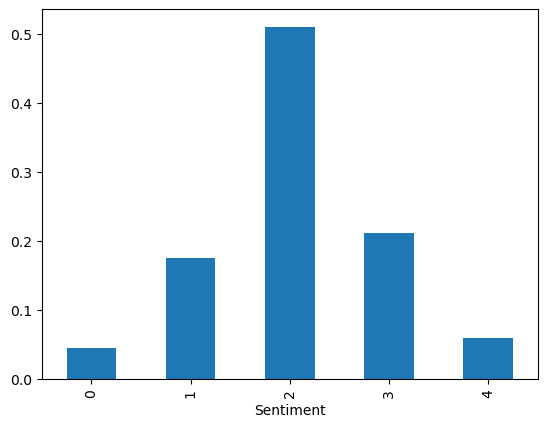

In [304]:
# Visualization of Distribution of Sentiments values in test dataset (in percentages)
raw_df.Sentiment.value_counts(normalize = True).sort_index().plot(kind = 'bar')

...

# 3 - Implement TF-IDF Technique

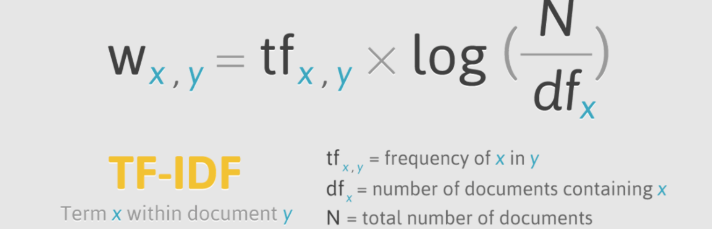

Compared to __Bag of Words__ technique (__BoW__), __TF-IDF__ technique (__Term Frequence inverse Document Frequency__) not only counts the frequency of words __Term Frequency__ (__TF__) but also considers the importance of each word by multiplying it by a __Inverse Document Frequency__ (__IDF__) which calculates how unique or rare a word is across all documents. Rare words get higher scores.

## 3.1 Creating a Custom Tokenizer with Stemmer

In [311]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [313]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [314]:
stemmer = SnowballStemmer(language = 'english')

In [315]:
stemmer.stem('jumping')

'jump'

In [319]:
def tokenize(text):
    return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [321]:
tokenize("i done (gave up) so much free time knowing time ain't free")

['i',
 'done',
 'gave',
 'up',
 'so',
 'much',
 'free',
 'time',
 'know',
 'time',
 'ai',
 'free']

## 3.2 Creating a List of Stop Words

In [324]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [326]:
from nltk.corpus import stopwords

In [328]:
english_stopwords = stopwords.words('english')
", ".join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [330]:
selected_stopwords = english_stopwords[:116]
", ".join(selected_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such"

## 3.3 - Configure and Create TfidVectorizer

In [333]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [335]:
vectorizer = TfidfVectorizer(tokenizer = tokenize,
                             stop_words = selected_stopwords,
                             ngram_range = (1, 2),
                             max_features = 2_500)

## 3.4 - Learn Vocabulary from Training Set

In [338]:
vectorizer.fit(raw_df.Phrase)

D:\conda\Lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
D:\conda\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2500, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x00000171F922C040>)

In [339]:
len(vectorizer.vocabulary_)

2500

In [340]:
vectorizer.get_feature_names_out()[:200]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'academi', 'accent', 'accept', 'access',
       'accomplish', 'account', 'accur', 'ach', 'achiev', 'across', 'act',
       'action', 'action film', 'action flick', 'action movi',
       'action sequenc', 'actor', 'actress', 'actual', 'ad', 'adam',
       'adam sandler', 'adapt', 'add', 'addit', 'address', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'advantag', 'adventur',
       'affair', 'affect', 'affirm', 'afraid', 'age', 'aggress', 'ago',
       'ahead', 'aid', 'aim', 'aimless', 'air', 'album', 'alien', 'aliv',
       'allen', 'allow', 'almost', 'almost everi', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american', 'ami',
       'among', 'amount', 'amus', 'analyz', 'anderson', 'angel', 'angl',
       'angst', 'anguish', 'ani', 'ani movi', 'anim', 'ann', 'annoy',
       'anoth'

# 4 - Transform Training & Test Data

## 4.1 - Transform phrases from training set

In [343]:
inputs = vectorizer.transform(raw_df.Phrase)

In [344]:
inputs.shape

(156060, 2500)

In [345]:
inputs.toarray()[0][:200]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## 4.2 - Transform phrases from test set

In [347]:
test_df.isna().sum()

PhraseId      0
SentenceId    0
Phrase        1
dtype: int64

In [357]:
rows_with_empty_cells = test_df[test_df.isna().any(axis=1)]
rows_with_empty_cells

,PhraseId,SentenceId,Phrase
15519,171580,9213,NaN


In [359]:
test_df['Phrase'].fillna('Oopsie NaN value', inplace = True)
test_df.isna().sum()

PhraseId      0
SentenceId    0
Phrase        0
dtype: int64

In [361]:
test_inputs = vectorizer.transform(test_df.Phrase)

In [362]:
test_inputs.shape

(66292, 2500)

In [363]:
test_inputs.toarray()[0][:1000]

array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 

# 5 - Train the Model

## 5.1 - Split into Training and Validation Set

In [366]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


There are some Phrases that are just a few words in lenght and Phrases that are part of other Phrases. Random splitting with train_test_split from sklearn may not work well. We should split the data manually

In [368]:
TRAIN_SIZE = 110_000

In [369]:
train_inputs = inputs[:TRAIN_SIZE]
train_targets = raw_df.Sentiment[:TRAIN_SIZE]

train_inputs.shape, train_targets.shape

((110000, 2500), (110000,))

In [370]:
val_inputs = inputs[TRAIN_SIZE:]
val_targets = raw_df.Sentiment[TRAIN_SIZE:]

val_inputs.shape, val_targets.shape

((46060, 2500), (46060,))

## 5.2 Train Logistic Regression Model

In [372]:
from sklearn.linear_model import LogisticRegression

In [373]:
model = LogisticRegression()

In [374]:
model.fit(train_inputs, train_targets)

D:\conda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [375]:
train_preds = model.predict(train_inputs)

In [376]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
109995    1
109996    0
109997    1
109998    0
109999    2
Name: Sentiment, Length: 110000, dtype: int64

In [377]:
train_preds

array([3, 2, 2, ..., 0, 0, 2], dtype=int64)

In [378]:
from sklearn.metrics import accuracy_score

In [379]:
accuracy_score(train_targets, train_preds)

0.6457181818181819

In [380]:
val_preds = model.predict(val_inputs)

In [381]:
accuracy_score(val_targets, val_preds)

0.5810898827616153

# 6 - Study Predictions on Sample Inputs

In [383]:
small_df = raw_df.sample(20)
small_df

,PhraseId,SentenceId,Phrase,Sentiment
47017,47018,2291,happens that tells you there is no sense .,1
91374,91375,4753,"charming ,",4
28722,28723,1331,A semi-autobiographical film that 's so sloppi...,0
154664,154665,8456,film buffs will eat up like so much gelati,4
35097,35098,1650,Bruce Joel Rubin,2
24541,24542,1117,Perry 's good and,3
23190,23191,1050,how desperate the makers of this ` we 're - do...,1
70494,70495,3595,", one is left with the inescapable conclusion ...",2
3424,3425,128,natural,2
141656,141657,7684,sacrificing any of the cultural intrigue,1


In [384]:
small_inputs = vectorizer.transform(small_df.Phrase)

In [385]:
small_preds = model.predict(small_inputs)
small_preds

array([2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 2, 1],
      dtype=int64)

# 7 - Make Predictions

In [387]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [388]:
test_inputs

<66292x2500 sparse matrix of type '<class 'numpy.float64'>'
	with 190073 stored elements in Compressed Sparse Row format>

In [389]:
test_preds = model.predict(test_inputs)
test_preds

array([3, 3, 2, ..., 2, 2, 1], dtype=int64)

In [415]:
submission_df.Sentiment = test_preds
submission_df

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [417]:
submission_df.to_csv('submission.csv', index = None)

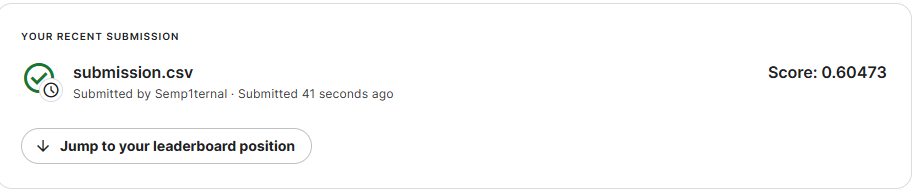

In [420]:
Percentile = 430/861
Percentile

0.4994192799070848